In [118]:
import pandas as pd

#Student ID: 012382979

# Separate columns into categorical and numerical types
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude target variable (ReAdmis) from predictors
categorical_columns.remove('ReAdmis')
numerical_columns.remove('CaseOrder')  # Placeholder column, not predictive
numerical_columns.remove('Zip')        # Remove zip code as it's not continuous in nature

# Display the separated column lists for reference
categorical_columns, numerical_columns


(['Customer_id',
  'Interaction',
  'UID',
  'City',
  'State',
  'County',
  'Area',
  'TimeZone',
  'Job',
  'Marital',
  'Gender',
  'Soft_drink',
  'Initial_admin',
  'HighBlood',
  'Stroke',
  'Complication_risk',
  'Overweight',
  'Arthritis',
  'Diabetes',
  'Hyperlipidemia',
  'BackPain',
  'Anxiety',
  'Allergic_rhinitis',
  'Reflux_esophagitis',
  'Asthma',
  'Services'],
 ['Lat',
  'Lng',
  'Population',
  'Children',
  'Age',
  'Income',
  'VitD_levels',
  'Doc_visits',
  'Full_meals_eaten',
  'vitD_supp',
  'Initial_days',
  'TotalCharge',
  'Additional_charges',
  'Item1',
  'Item2',
  'Item3',
  'Item4',
  'Item5',
  'Item6',
  'Item7',
  'Item8'])

In [120]:
from scipy.stats import chi2_contingency

# Function to perform chi-square tests for categorical variables
chi_square_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(data['ReAdmis'], data[col])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Filter results with significant associations (p < 0.05)
significant_chi_square = {col: p for col, p in chi_square_results.items() if p < 0.05}
significant_chi_square

{'Services': 0.03075281113212747}

In [122]:
# Analyze the correlation between the 'Services' column and 'ReAdmis'
service_readmission_counts = pd.crosstab(data['Services'], data['ReAdmis'])

# Calculate percentages of readmissions for each service type
service_readmission_percentages = service_readmission_counts.div(service_readmission_counts.sum(axis=1), axis=0) * 100

# Sort services by percentage of readmissions
sorted_service_readmission = service_readmission_percentages.sort_values(by='Yes', ascending=False)
sorted_service_readmission

ReAdmis,No,Yes
Services,,
CT Scan,60.163265,39.836735
MRI,61.052632,38.947368
Blood Work,63.342830,36.657170
Intravenous,64.760383,35.239617


In [124]:
from scipy.stats import ttest_ind, f_oneway

# Separate the data based on readmission status
readmitted = data[data['ReAdmis'] == 'Yes']
not_readmitted = data[data['ReAdmis'] == 'No']

# Perform t-tests for numerical variables
t_test_results = {}

for col in numerical_columns:
    t_stat, p_val = ttest_ind(readmitted[col], not_readmitted[col], equal_var=False)
    t_test_results[col] = p_val

# Filter results with significant associations (p < 0.05)
significant_t_tests = {col: p for col, p in t_test_results.items() if p < 0.05}
significant_t_tests

{'Population': 0.04870065764061777,
 'Children': 0.019761252128566477,
 'Initial_days': 0.0,
 'TotalCharge': 0.0}

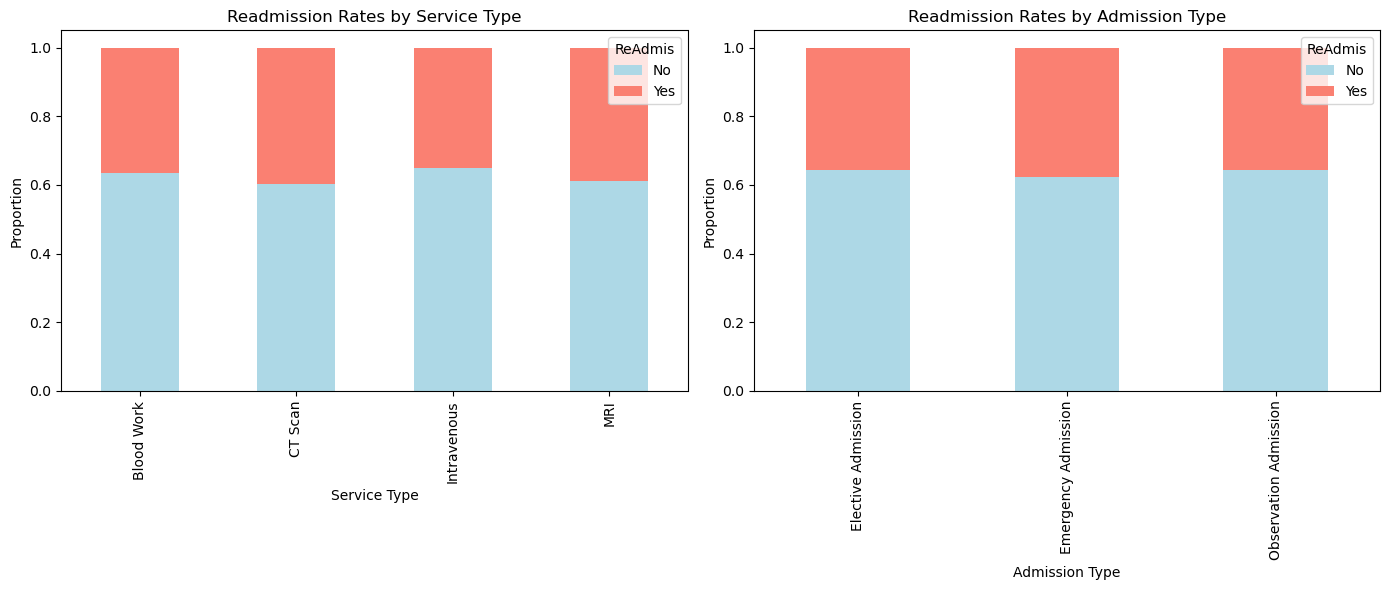

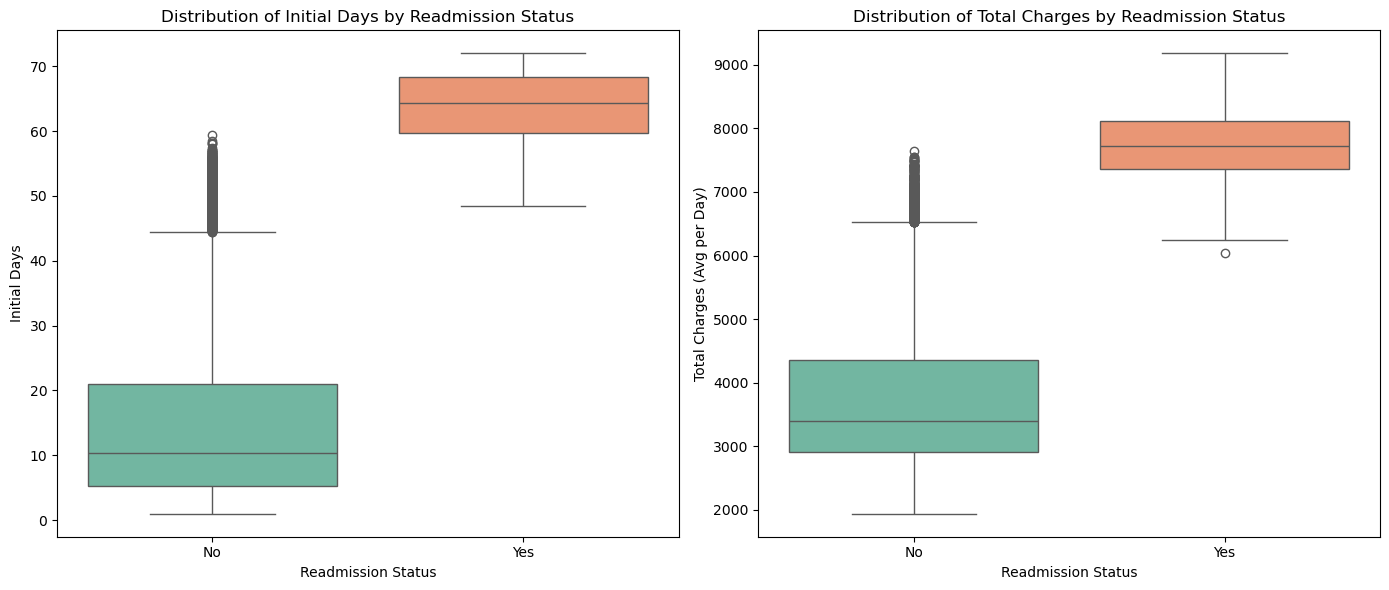

In [126]:
# Creating the visualizations for bivariate statistics

# Distribution of categorical variables using bivariate statistics (stacked bar plots)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Services vs ReAdmis
services_counts = pd.crosstab(data['Services'], data['ReAdmis'])
services_counts.div(services_counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[0], color=['lightblue', 'salmon'])
ax[0].set_title("Readmission Rates by Service Type")
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("Service Type")
ax[0].legend(title="ReAdmis", loc="upper right")

# Initial Admin vs ReAdmis
admin_counts = pd.crosstab(data['Initial_admin'], data['ReAdmis'])
admin_counts.div(admin_counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[1], color=['lightblue', 'salmon'])
ax[1].set_title("Readmission Rates by Admission Type")
ax[1].set_ylabel("Proportion")
ax[1].set_xlabel("Admission Type")
ax[1].legend(title="ReAdmis", loc="upper right")

plt.tight_layout()
plt.show()

# Distribution of continuous variables using box plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Initial_days vs ReAdmis
sns.boxplot(data=data, x='ReAdmis', y='Initial_days', ax=ax[0], hue='ReAdmis', palette="Set2", dodge=False, legend=False)
ax[0].set_title("Distribution of Initial Days by Readmission Status")
ax[0].set_ylabel("Initial Days")
ax[0].set_xlabel("Readmission Status")

# TotalCharge vs ReAdmis
sns.boxplot(data=data, x='ReAdmis', y='TotalCharge', ax=ax[1], hue='ReAdmis', palette="Set2", dodge=False, legend=False)
ax[1].set_title("Distribution of Total Charges by Readmission Status")
ax[1].set_ylabel("Total Charges (Avg per Day)")
ax[1].set_xlabel("Readmission Status")

plt.tight_layout()
plt.show()

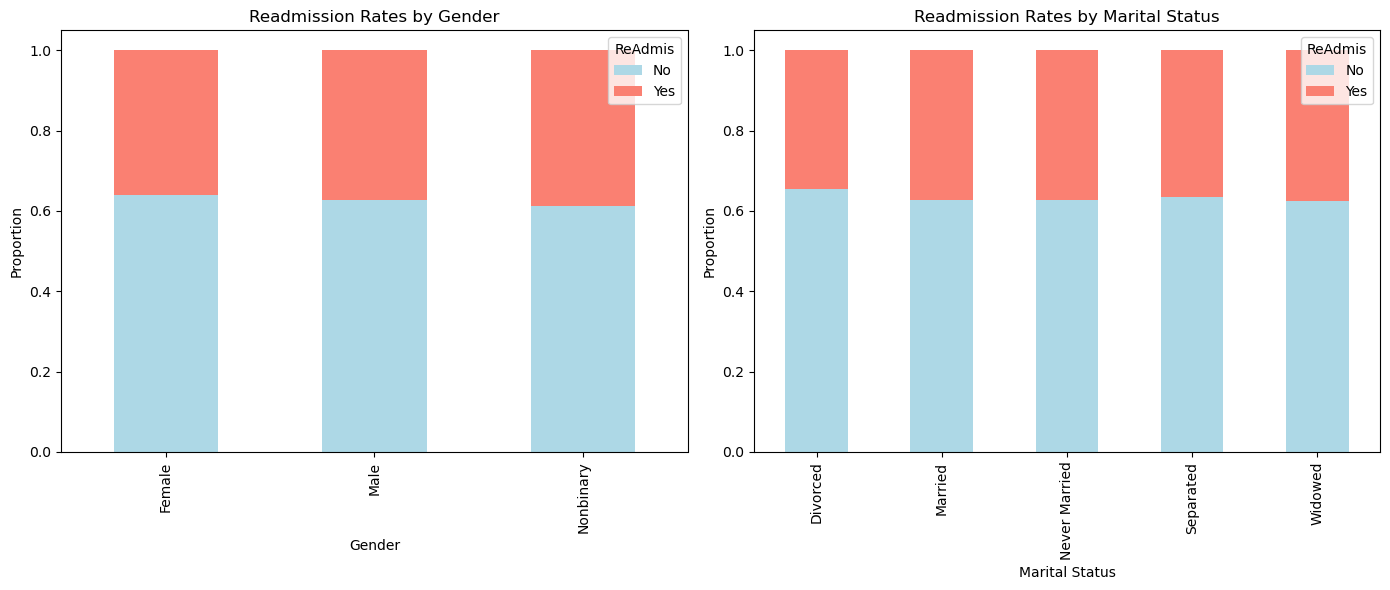

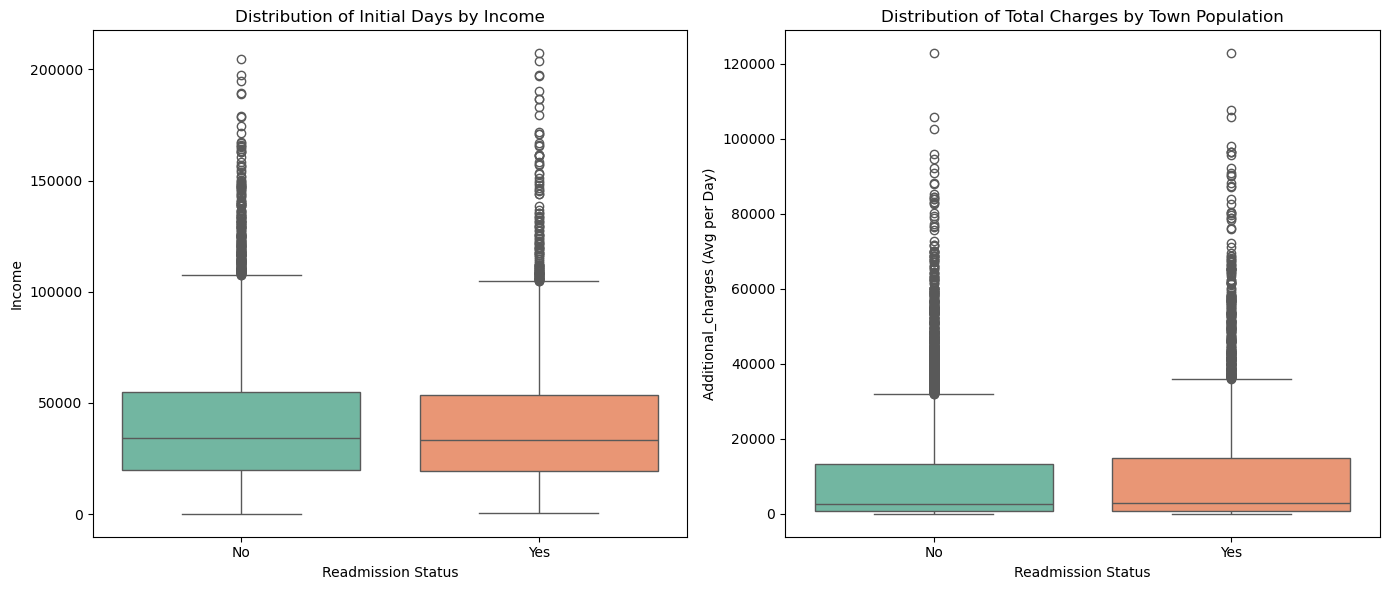

In [128]:
# Creating the 2nd set of visualizations for bivariate statistics

#2 Categorical Value Comparisons

# Distribution of categorical variables using bivariate statistics (stacked bar plots)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gender vs ReAdmis
services_counts = pd.crosstab(data['Gender'], data['ReAdmis'])
services_counts.div(services_counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[0], color=['lightblue', 'salmon'])
ax[0].set_title("Readmission Rates by Gender")
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("Gender")
ax[0].legend(title="ReAdmis", loc="upper right")

# Marital vs ReAdmis
admin_counts = pd.crosstab(data['Marital'], data['ReAdmis'])
admin_counts.div(admin_counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[1], color=['lightblue', 'salmon'])
ax[1].set_title("Readmission Rates by Marital Status")
ax[1].set_ylabel("Proportion")
ax[1].set_xlabel("Marital Status")
ax[1].legend(title="ReAdmis", loc="upper right")

plt.tight_layout()
plt.show()

#2 Continuous Value Comparisons

# Distribution of continuous variables using box plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Income vs ReAdmis
sns.boxplot(data=data, x='ReAdmis', y='Income', ax=ax[0], hue='ReAdmis', palette="Set2", dodge=False, legend=False)
ax[0].set_title("Distribution of Initial Days by Income")
ax[0].set_ylabel("Income")
ax[0].set_xlabel("Readmission Status")

# Additional_charges vs ReAdmis
sns.boxplot(data=data, x='ReAdmis', y='Population', ax=ax[1], hue='ReAdmis', palette="Set2", dodge=False, legend=False)
ax[1].set_title("Distribution of Total Charges by Town Population")
ax[1].set_ylabel("Additional_charges (Avg per Day)")
ax[1].set_xlabel("Readmission Status")

plt.tight_layout()
plt.show()